<a href="https://colab.research.google.com/github/Aditya-21052131/Analyzing-Customer-Data/blob/main/Analyzing_Customer_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
np.random.seed(0)
customer_data = pd.DataFrame({
    'age': np.random.randint(18, 65, size=100),
    'purchase_date': pd.date_range(start='2020-01-01', periods=100, freq='D'),
    'purchase_amount': np.random.randint(0, 5000, size=100),
    'gender': np.random.choice(['Male', 'Female'], size=100),
    'location': np.random.choice(['City', 'Suburb', 'Rural'], size=100)
})

In [3]:
customer_data['purchase_date'] = pd.to_datetime(customer_data['purchase_date'])  # Convert purchase date to datetime format

In [4]:
customer_data['age_group'] = pd.cut(customer_data['age'], bins=[18, 25, 35, 45, 55, 65], labels=['18-24', '25-34', '35-44', '45-54', '55-64'])  # Create age groups
customer_data['purchase_amount_group'] = pd.cut(customer_data['purchase_amount'], bins=[0, 100, 500, 1000, 5000], labels=['Low', 'Medium', 'High', 'Very High'])  # Create purchase amount groups

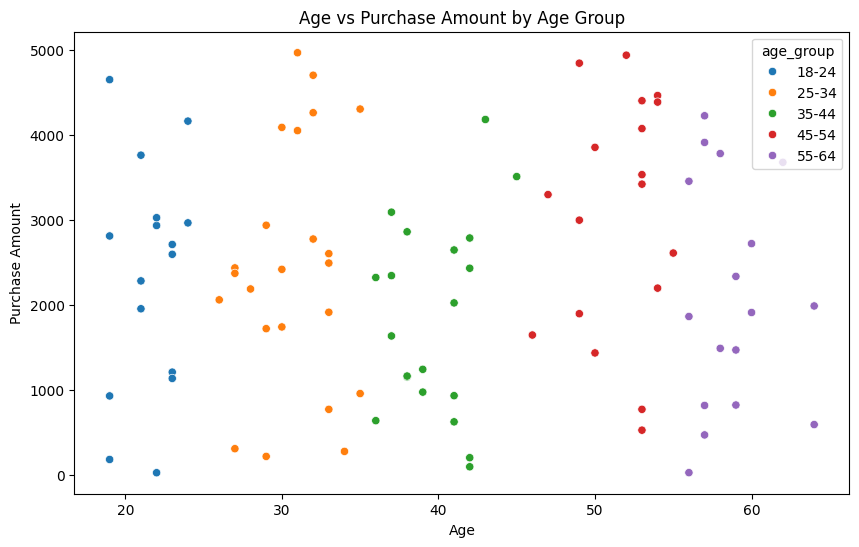

<ipython-input-8-5bf1d5a532e2>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(x='purchase_amount_group', y='count', data=customer_data.groupby('purchase_amount_group').size().reset_index(name='count'))


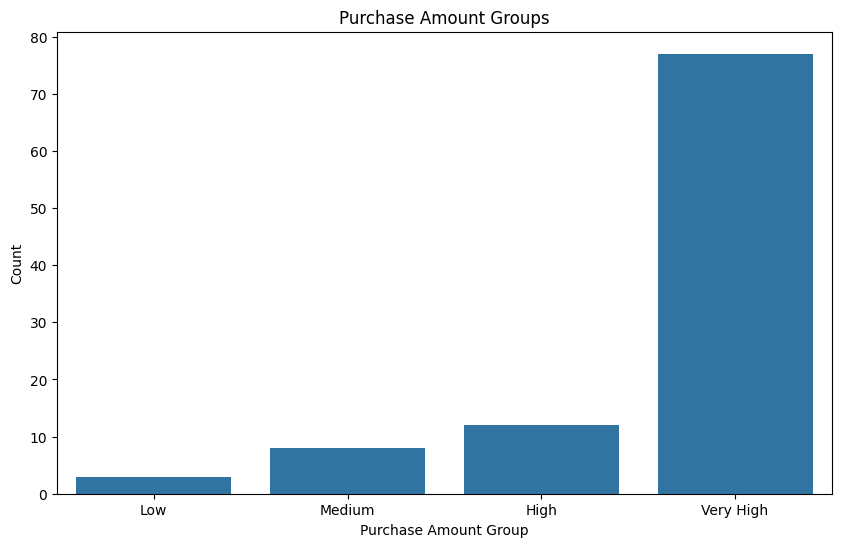

ValueError: could not convert string to float: 'Female'

<Figure size 1000x600 with 0 Axes>

In [8]:
# Scatter plot of age vs purchase amount by age group
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='purchase_amount', hue='age_group', data=customer_data)
plt.title('Age vs Purchase Amount by Age Group')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.show()

# Bar chart of purchase amount groups
plt.figure(figsize=(10, 6))
sns.barplot(x='purchase_amount_group', y='count', data=customer_data.groupby('purchase_amount_group').size().reset_index(name='count'))
plt.title('Purchase Amount Groups')
plt.xlabel('Purchase Amount Group')
plt.ylabel('Count')
plt.show()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(customer_data.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [7]:
# Calculate means and standard deviations of purchase amounts by age group
age_group_means = customer_data.groupby('age_group')['purchase_amount'].mean()
age_group_stds = customer_data.groupby('age_group')['purchase_amount'].std()

print("Means and Standard Deviations of Purchase Amounts by Age Group:")
print(age_group_means)
print(age_group_stds)

Means and Standard Deviations of Purchase Amounts by Age Group:
age_group
18-24    2333.000000
25-34    2458.782609
35-44    1842.200000
45-54    3071.833333
55-64    2091.000000
Name: purchase_amount, dtype: float64
age_group
18-24    1347.475021
25-34    1425.093169
35-44    1144.094521
45-54    1392.079581
55-64    1341.633473
Name: purchase_amount, dtype: float64


<ipython-input-7-dd1af7de68c5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_means = customer_data.groupby('age_group')['purchase_amount'].mean()
<ipython-input-7-dd1af7de68c5>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stds = customer_data.groupby('age_group')['purchase_amount'].std()
